In [5]:
import glob
import os
import time
import datetime
import aplpy as ap

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from astropy.io import fits

from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

In [6]:
def init():
    '''
    Initialise first frame with first image
    '''
    ttl.set_text('')
    tt2.set_text('')
    im.set_array(f(images[0]))
    zmi.set_array(f2(images[0]))
    return (im,)


def f(filename):
    '''
    Frame update function
    '''
    return fits.open(filename)[0].data[0,0,:,:]

def f1(filename):
    '''
    Frame update function
    '''
    return fits.open(filename)[0].data[0,0,pos[1]-delta/2:pos[1]+delta/2,pos[0]-delta/2:pos[0]+delta/2]


def updatefig(i, *args):
    '''
    Update image data for frame.
    '''
    im.set_array(f(images[i]))
    zmi.set_array(f1(images[i]))
    ttl.set_text(os.path.basename(images[i])[:10])
    tt2.set_text(os.path.basename(images[i])[11:19])
    i += 1
    return im,

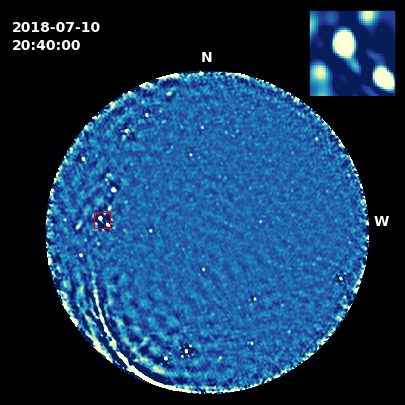

In [33]:
cmap = matplotlib.cm.YlGnBu_r
cmap.set_bad('black')

fig = plt.figure(figsize=(6,6))

plt.rcParams['figure.facecolor'] = 'black'

pos = [180,550] # X, Y pixel coordinates of the transient candidate
delta = 50 # width of the zoom-in box
path="/home/shulevski/Desktop/20180710_2/2018-07-10T2[0,1]:??:?0-S*-B*.fits" #path to the images, including image selection

'''
TODO (AARTFAAC only?): add WCS capability, coordinate grid overlay
Add constellation lines, like:
from astropy import units as u
from astropy.coordinates import concatenate, SkyCoord
bd = concatenate((SkyCoord.from_name('Alkaid'),  # stars in Big Dipper
...                   SkyCoord.from_name('Mizar'),
...                   SkyCoord.from_name('Alioth'),
...                   SkyCoord.from_name('Megrez'),
...                   SkyCoord.from_name('Phecda'),
...                   SkyCoord.from_name('Merak'),
...                   SkyCoord.from_name('Dubhe'))
line = main.add_line(bd, width=3 * u.pixel)

Add cardinal direction labels (NEWS)
'''

images = np.array(sorted(glob.glob(path)))
len(images)
i = 0
main = fig.add_axes([.09, .01, .75, .75])
im = main.imshow(f(images[i]), vmin=-30, vmax = 80, animated=True, cmap=cmap, origin='lower')

zmbox = patches.Rectangle((pos[0]-delta/2,pos[1]-delta/2),delta,delta,linewidth=1,edgecolor='r',facecolor='none',aa=True,animated=True)
main.add_patch(zmbox)
main.set_facecolor('black')

label = fig.add_axes([.01, .8, .3, .1])
label.set_facecolor('black')
ttl = label.text(0.01, 0.5, '', color="white", fontsize=14, weight="bold")
tt2 = label.text(0.01, 0.1, '', color="white", fontsize=14, weight="bold")

zoom = fig.add_axes([.7, .7, .2, .2])
zmi = zoom.imshow(f1(images[i]), vmin=-30, vmax = 80, animated=True, cmap=cmap, origin='lower')

north = fig.add_axes([.4, .78, .1, .1])
north.set_facecolor('black')
no = north.text(0.5, 0.01, 'N', color="white", fontsize=14, weight="bold")

west = fig.add_axes([.85, .4, .01, .1])
west.set_facecolor('black')
we = west.text(0.01, 0.01, 'W', color="white", fontsize=14, weight="bold")

plt.setp(label, xticks=[], yticks=[])
plt.setp(main, xticks=[], yticks=[])
plt.setp(zoom, xticks=[], yticks=[])
plt.setp(north, xticks=[], yticks=[])
plt.setp(west, xticks=[], yticks=[])
plt.tight_layout()

ani = animation.FuncAnimation(fig, updatefig, interval=150, frames=len(images), blit=True)

In [34]:
# Breaks if too large

# HTML(ani.to_html5_video())

In [35]:
#  Save video
save_path="/home/shulevski/Desktop/20180710_2/TEST.mp4"
t1 = time.time()
ani.save(save_path, savefig_kwargs={'facecolor':'black'})
print time.time() -  t1, "seconds for", len(images), "frames."

1.58405900002 seconds for 28 frames.
